# **Factorial Designs**

### i)Independent factorial design
### ii)Repeated measure or related factorial design
### iii)Mixed Design

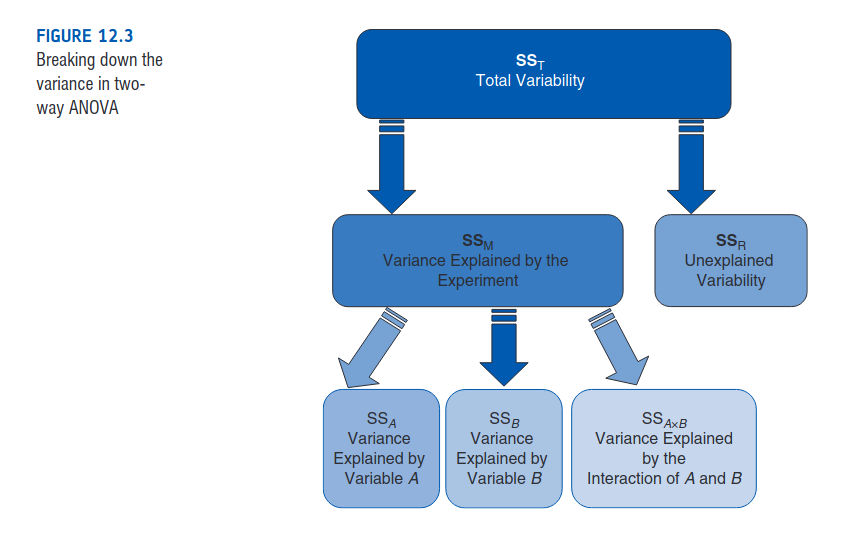

In [1]:
from IPython.display import Image
Image('factorialAnova.png')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pingouin as pg
%matplotlib inline

In [3]:
data = pd.read_csv('goggles.csv')
data.head()

,gender,alcohol,attractiveness
0,Female,None,65
1,Female,None,70
2,Female,None,60
3,Female,None,60
4,Female,None,60


In [4]:
data['genderX'] = data['gender'].replace({'Male':1, 'Female':2})
data['alcoholX'] = data['alcohol'].replace({'None':1, '2 Pints':2,'4 Pints':3})

In [5]:
data.head()

,gender,alcohol,attractiveness,genderX,alcoholX
0,Female,None,65,2,1
1,Female,None,70,2,1
2,Female,None,60,2,1
3,Female,None,60,2,1
4,Female,None,60,2,1


In [6]:
data.groupby(['genderX', 'alcoholX']).describe()

attractiveness                                               \
                          count    mean        std   min    25%   50%    75%   
genderX alcoholX                                                               
1       1                   8.0  66.875  10.329396  50.0  62.50  67.5  75.00   
        2                   8.0  66.875  12.517844  45.0  60.00  67.5  72.50   
        3                   8.0  35.625  10.835622  20.0  30.00  32.5  41.25   
2       1                   8.0  60.625   4.955156  55.0  58.75  60.0  61.25   
        2                   8.0  62.500   6.546537  50.0  60.00  62.5  66.25   
        3                   8.0  57.500   7.071068  50.0  53.75  55.0  61.25   

                        
                   max  
genderX alcoholX        
1       1         80.0  
        2         85.0  
        3         55.0  
2       1         70.0  
        2         70.0  
        3         70.0

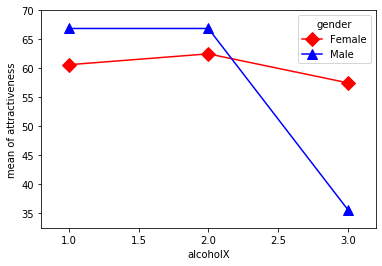

In [7]:
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(data.alcoholX, data.gender, data.attractiveness,
             colors=['red','blue'], markers=['D','^'], ms=10)

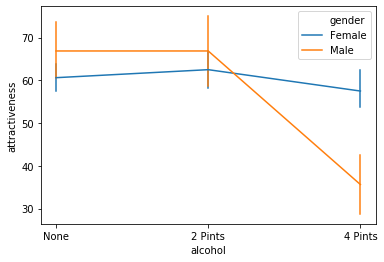

In [8]:
_ = sns.lineplot(x='alcohol', y='attractiveness', hue='gender', err_style="bars",sort=False,data=data)

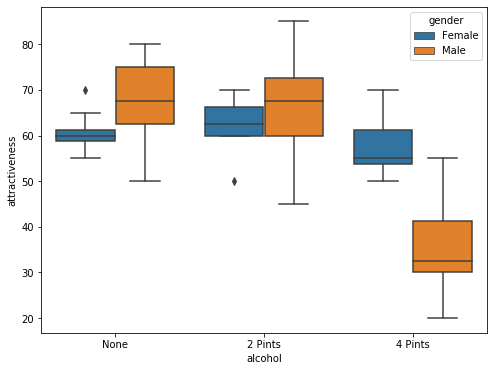

In [9]:
plt.figure(figsize=(8,6))
_ = sns.boxplot(x='alcohol', y='attractiveness', hue='gender', data=data)

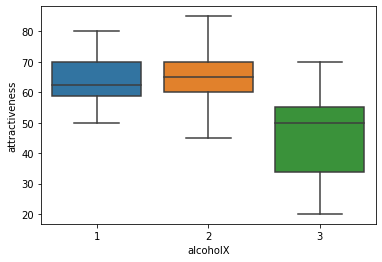

In [10]:
_ = sns.boxplot(x='alcoholX', y='attractiveness', data=data)

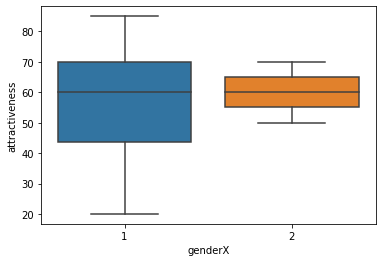

In [11]:
_ = sns.boxplot(x='genderX', y='attractiveness', data=data)

In [12]:
pg.homoscedasticity(data, dv='attractiveness',group='alcoholX')

,W,pval,equal_var
levene,2.323789,0.109541,True


In [13]:
pg.homoscedasticity(data, dv='attractiveness',group='genderX')

,W,pval,equal_var
levene,19.979152,0.000051,False


In [14]:
unique_list = [1,2,3,4,5,6]
unique_list

[1, 2, 3, 4, 5, 6]

In [15]:
data['interaction'] = 0

In [16]:
for i in range(6):
    for j in range(8):
        data.at[8*i+j,'interaction'] = unique_list[i]


In [17]:
data.tail()

,gender,alcohol,attractiveness,genderX,alcoholX,interaction
43,Male,4 Pints,55,1,3,6
44,Male,4 Pints,35,1,3,6
45,Male,4 Pints,20,1,3,6
46,Male,4 Pints,45,1,3,6
47,Male,4 Pints,40,1,3,6


In [18]:
# Levene test across interaction variables
pg.homoscedasticity(data, dv='attractiveness',group='interaction')

,W,pval,equal_var
levene,1.425225,0.235068,True


### ***A non-significant result like the one we have here, W(5, 42) = 1.425, p = .235, is indicative of the assumption being met.***

In [19]:
m01 = smf.ols('attractiveness~C(genderX)*C(alcoholX)', data=data).fit()
m01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         attractiveness   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     13.20
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           9.61e-08
Time:                        10:24:50   Log-Likelihood:                -170.97
No. Observations:                  48   AIC:                             353.9
Df Residuals:                      42   BIC:                             365.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           66.8750      3.222     20.758      0.000      60.373      73.377
C(genderX)[T.2]                     -6.2500      4.556     -1.372      0.177     -15.445       2.945
C(alcoholX)[T.2]                  3.331e-16      4.556   7.31e-17      1.000      -9.195       9.195
C(alcoholX)[T.3]                   -31.2500      4.556     -6.859      0.000     -40.445     -22.055
C(genderX)[T.2]:C(alcoholX)[T.2]     1.8750      6.443      0.291      0.772     -11.128      14.878
C(genderX)[T.2]:C(alcoholX)[T.3]    28.1250      6.443      4.365      0.000      15.122      41.128
==============================================================================
Omnibus:                        0.446   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.800   Jarque-Bera (JB):                0.057
Skew:                          -0.041   Prob(JB):                        0.972
Kurtosis:                       3.147   Cond. No.                         9.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## https://www.statsmodels.org/devel/examples/notebooks/generated/contrasts.html#examples-notebooks-generated-contrasts--page-root

In [20]:
con1 = [-2,1,1]
con2 = [0,-1,1]
contrast = np.vstack((con1, con2))
contrast_alc = contrast.T
contrast_alc

array([[-2,  0],
       [ 1, -1],
       [ 1,  1]])

In [21]:
contrast_gen = np.array([[1,-1]])

In [22]:
contrast_gen =contrast_gen.reshape(2,1)
contrast_gen

array([[ 1],
       [-1]])

In [23]:
m02 = smf.ols('attractiveness~C(genderX,contrast_gen)*C(alcoholX, contrast_alc)', data=data).fit()
m02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         attractiveness   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     13.20
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           9.61e-08
Time:                        10:24:51   Log-Likelihood:                -170.97
No. Observations:                  48   AIC:                             353.9
Df Residuals:                      42   BIC:                             365.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================================================================
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                               58.3333      1.315     44.351      0.000      55.679      60.988
C(genderX, contrast_gen)[custom0]                                       -1.8750      1.315     -1.426      0.161      -4.529       0.779
C(alcoholX, contrast_alc)[custom0]                                      -2.7083      0.930     -2.912      0.006      -4.585      -0.831
C(alcoholX, contrast_alc)[custom1]                                      -9.0625      1.611     -5.626      0.000     -12.313      -5.812
C(genderX, contrast_gen)[custom0]:C(alcoholX, contrast_alc)[custom0]    -2.5000      0.930     -2.688      0.010      -4.377      -0.623
C(genderX, contrast_gen)[custom0]:C(alcoholX, contrast_alc)[custom1]    -6.5625      1.611     -4.074      0.000      -9.813      -3.312
==============================================================================
Omnibus:                        0.446   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.800   Jarque-Bera (JB):                0.057
Skew:                          -0.041   Prob(JB):                        0.972
Kurtosis:                       3.147   Cond. No.                         1.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
sm.stats.anova_lm(m02,typ=3)

,sum_sq,df,F,PR(>F)
Intercept,163333.333333,1.0,1967.025090,6.571285e-37
"C(genderX, contrast_gen)",168.750000,1.0,2.032258,1.613818e-01
"C(alcoholX, contrast_alc)",3332.291667,2.0,20.065412,7.649011e-07
"C(genderX, contrast_gen):C(alcoholX, contrast_alc)",1978.125000,2.0,11.911290,7.986603e-05
Residual,3487.500000,42.0,NaN,NaN


# **Simple Effect Analysis**

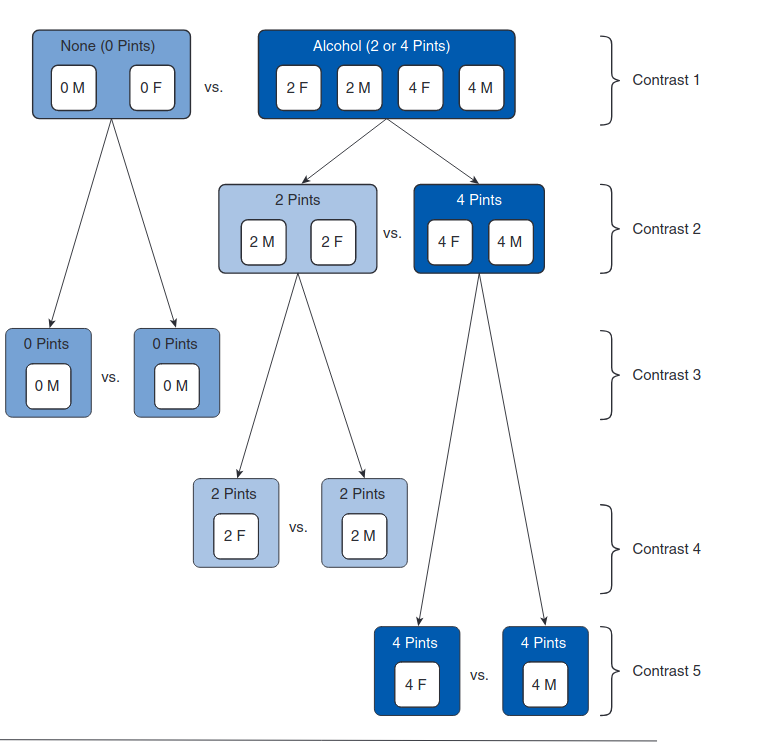

In [25]:
Image('simpleEffectAnalysis.png')

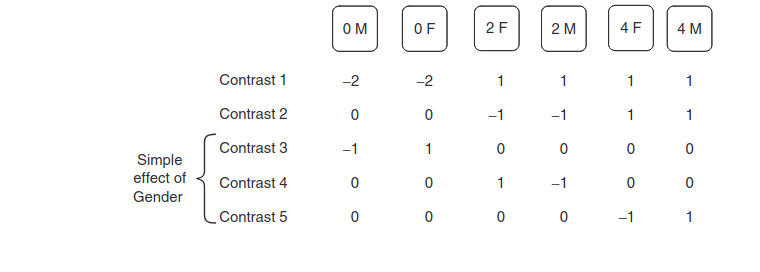

In [26]:
Image('sea_table.png')

In [27]:
contrast1 = [-2, 1, 1, -2, 1, 1]
contrast2 = [0, -1, 1, 0, -1, 1]
contrast3 = [ 1, 0, 0, -1, 0, 0]
contrast4 = [ 0, 1, 0, 0, -1, 0]
contrast5 = [ 0, 0, -1, 0, 0, 1]

In [28]:
final_contrast = np.vstack((contrast1, contrast2, contrast3, contrast4, contrast5))
final_contrast = final_contrast.T
final_contrast  # according to levels, i.e 0F, 2F, 4F, 0M, 2M, 4M

array([[-2,  0,  1,  0,  0],
       [ 1, -1,  0,  1,  0],
       [ 1,  1,  0,  0, -1],
       [-2,  0, -1,  0,  0],
       [ 1, -1,  0, -1,  0],
       [ 1,  1,  0,  0,  1]])

In [29]:
m03 = smf.ols('attractiveness~C(interaction,final_contrast)', data=data).fit()
m03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         attractiveness   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     13.20
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           9.61e-08
Time:                        10:24:52   Log-Likelihood:                -170.97
No. Observations:                  48   AIC:                             353.9
Df Residuals:                      42   BIC:                             365.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  58.3333      1.315     44.351      0.000      55.679      60.988
C(interaction, final_contrast)[custom0]    -2.7083      0.930     -2.912      0.006      -4.585      -0.831
C(interaction, final_contrast)[custom1]    -9.0625      1.611     -5.626      0.000     -12.313      -5.812
C(interaction, final_contrast)[custom2]    -3.1250      2.278     -1.372      0.177      -7.722       1.472
C(interaction, final_contrast)[custom3]    -2.1875      2.278     -0.960      0.342      -6.785       2.410
C(interaction, final_contrast)[custom4]   -10.9375      2.278     -4.801      0.000     -15.535      -6.340
==============================================================================
Omnibus:                        0.446   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.800   Jarque-Bera (JB):                0.057
Skew:                          -0.041   Prob(JB):                        0.972
Kurtosis:                       3.147   Cond. No.                         2.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ***The resulting output contains the parameter estimates for the five contrasts. Looking at the significance values for each simple effect, it appears that there was no significant difference between men and women when they drank no alcohol, p = .177, or when they drank 2 pints, p = .34, but there was a very significant difference, p < .001, when 4 pints were consumed (which, judging from the interaction graph, reflects the fact that the mean for men is considerably lower than for women).***

# **Post-Hoc test**

In [30]:
from statsmodels.sandbox.stats.multicomp import MultiComparison

In [31]:
multicomp = MultiComparison(data['attractiveness'], data['alcoholX'])   # testfunc

In [32]:
# Bonferroni
com = multicomp.allpairtest(st.ttest_ind, method='bonf')
print(com[0])

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
     1      2 -0.2877 0.7756       1.0  False
     1      3  4.1278 0.0003    0.0008   True
     2      3  4.1584 0.0002    0.0007   True
---------------------------------------------


In [33]:
# Tukey HSD
co = multicomp.tukeyhsd(alpha=0.05)
co.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.9375,0.9,-8.6504,10.5254,False
1,3,-17.1875,0.001,-26.7754,-7.5996,True
2,3,-18.125,0.001,-27.7129,-8.5371,True


In [34]:
multicomp2 = MultiComparison(data['attractiveness'], data['interaction'])   # testfunc

In [35]:
# Bonferroni
com = multicomp2.allpairtest(st.ttest_ind, method='bonf')
print(com[0])

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.00, alphacBonf=0.003
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
     1      2 -0.6459 0.5288       1.0  False
     1      3  1.0237 0.3234       1.0  False
     1      4  -1.543 0.1451       1.0  False
     1      5 -1.3131 0.2103       1.0  False
     1      6  5.9347    0.0    0.0005   True
     2      3  1.4676 0.1643       1.0  False
     2      4 -1.0119 0.3288       1.0  False
     2      5  -0.876 0.3958       1.0  False
     2      6  6.0044    0.0    0.0005   True
     3      4 -2.1183 0.0525    0.7878  False
     3      5 -1.8444 0.0864       1.0  False
     3      6  4.7819 0.0003    0.0044   True
     4      5     0.0    1.0       1.0  False
     4      6  5.9043    0.0    0.0006   True
     5      6  5.3387 0.0001    0.0016   True
---------------------------------------------


In [36]:
prediction = pd.DataFrame(m01.fittedvalues)
prediction.columns = ['predicted'] 
prediction.tail()

,predicted
43,35.625
44,35.625
45,35.625
46,35.625
47,35.625


In [37]:
prediction['standarized_prediction']  = (prediction['predicted']-prediction['predicted'].mean())/prediction['predicted'].std()

In [38]:
import statsmodels.stats.outliers_influence as sms

In [39]:
summary_frame = sms.OLSInfluence(m01).summary_frame()

In [40]:
summary_frame = pd.merge(summary_frame, prediction, how = 'inner', left_index = True, right_index = True)

# **Some Plots**

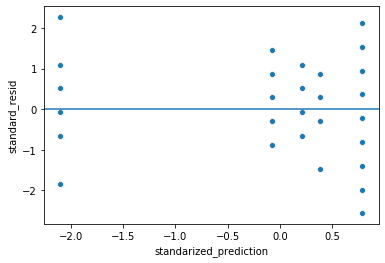

In [41]:
_ = sns.scatterplot(y = 'standard_resid', x='standarized_prediction', data = summary_frame)
_ = plt.axhline(y=0)

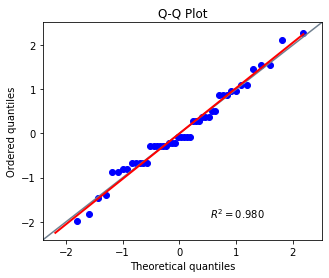

In [42]:
_ = pg.qqplot(summary_frame['standard_resid'], confidence=False)

### . The plot we have does show funnelling (the spread of scores is wider at some points than at others), which implies that the residuals might be heteroscedastic (a bad thing). The second plot (on the right) is a Q-Q plot , which tells us about the normality of residuals in the model, from plot we can say our assumptions of normally distributed residuals have been true.

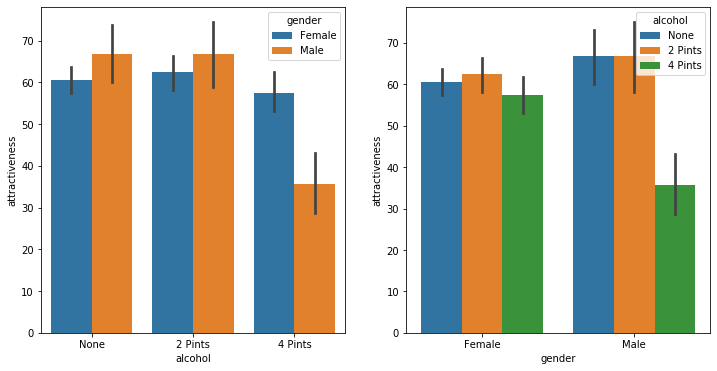

In [43]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
_ = sns.barplot(x='alcohol', y='attractiveness', data=data, hue='gender')
plt.subplot(1,2,2)
_ = sns.barplot(x='gender', y='attractiveness', data=data, hue='alcohol')

# **Robust Factorial Anova**

In [44]:
data_1 = data[data['interaction']==1]
data_2 = data[data['interaction']==2]
data_3 = data[data['interaction']==3]
data_4 = data[data['interaction']==4]
data_5 = data[data['interaction']==5]
data_6 = data[data['interaction']==6]

In [45]:
st.kruskal(data_1['attractiveness'], data_2['attractiveness'], data_3['attractiveness'],data_4['attractiveness'],data_5['attractiveness'],data_6['attractiveness'])

KruskalResult(statistic=22.646737025561556, pvalue=0.00039430018097061473)

In [46]:
sm.stats.anova_lm(m01,typ=3,robust="hc1")

,sum_sq,df,F,PR(>F)
Intercept,27844.063808,1.0,335.326360,1.228294e-21
C(genderX),197.704082,1.0,2.380952,1.303246e-01
C(alcoholX),3586.327016,2.0,21.595087,3.548587e-07
C(genderX):C(alcoholX),2026.763804,2.0,12.204169,6.630713e-05
Residual,3487.500000,42.0,NaN,NaN


In [47]:
sm.stats.anova_lm(m01,typ=3,robust="hc3")

,sum_sq,df,F,PR(>F)
Intercept,24363.555832,1.0,293.410565,1.467245e-20
C(genderX),172.991071,1.0,2.083333,1.563325e-01
C(alcoholX),3138.036139,2.0,18.895701,1.403321e-06
C(genderX):C(alcoholX),1773.418328,2.0,10.678648,1.780352e-04
Residual,3487.500000,42.0,NaN,NaN


In [48]:
import scikit_posthocs as sp
sp.posthoc_wilcoxon(data, val_col = 'attractiveness', group_col='interaction')

/home/atrides/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,1,2,3,4,5,6
1,-1.000000,0.317311,0.248213,0.259086,0.260858,0.011514
2,0.317311,-1.000000,0.128978,0.397321,0.359169,0.011412
3,0.248213,0.128978,-1.000000,0.047715,0.055316,0.017756
4,0.259086,0.397321,0.047715,-1.000000,1.000000,0.011616
5,0.260858,0.359169,0.055316,1.000000,-1.000000,0.011616
6,0.011514,0.011412,0.017756,0.011616,0.011616,-1.000000


# **lets do some calculation using hand**

In [49]:
data.head()

,gender,alcohol,attractiveness,genderX,alcoholX,interaction
0,Female,None,65,2,1,1
1,Female,None,70,2,1,1
2,Female,None,60,2,1,1
3,Female,None,60,2,1,1
4,Female,None,60,2,1,1


In [50]:
data['attractiveness'].describe()

count    48.000000
mean     58.333333
std      13.812318
min      20.000000
25%      53.750000
50%      60.000000
75%      66.250000
max      85.000000
Name: attractiveness, dtype: float64

In [51]:
x_grand =  data['attractiveness'].mean()
x_grand

58.333333333333336

### ***Calculating sum of squares***

In [52]:
SSt = data['attractiveness'].std()**2 * (47)
SSt

8966.666666666664

In [53]:
SSm = 0
for i in range(1,7):
    a = eval(f'data_{i}')
    g_mean = a['attractiveness'].mean()
    SSm = SSm+8*(g_mean-x_grand)**2
SSm

5479.166666666667

In [54]:
SSr = SSt - SSm
SSr

3487.4999999999973

In [55]:
data_m = data[data['gender']=='Male']
data_f = data[data['gender']=='Female']

In [56]:
## SS_gender
SSa = 0
gender_l = ['m', 'f']
for i in range(2):
    a = eval(f'data_{gender_l[i]}')
    g_mean = a['attractiveness'].mean()
    SSa = SSa+24*(g_mean-x_grand)**2
SSa

168.75

In [57]:
alcohol_list = ['no', '2pint', '4pint']
alcohol_no = data[data['alcoholX']==1]
alcohol_2pint = data[data['alcoholX']==2]
alcohol_4pint = data[data['alcoholX']==3]

In [58]:
## SS_alcohol
SSb = 0
for i in range(3):
    a = eval(f'alcohol_{alcohol_list[i]}')
    g_mean = a['attractiveness'].mean()
    SSb = SSb+16*(g_mean-x_grand)**2
SSb

3332.291666666667

In [59]:
SSab = SSm - SSa - SSb
SSab

1978.125

In [60]:
SSr = SSt-SSm
SSr

3487.4999999999973

### ***Calculating degree of freedom***

In [61]:
n = 48
k = 6

In [62]:
df_SSt = n-1
df_SSt

47

In [63]:
df_SSm = k-1
df_SSm

5

In [64]:
df_SSa = 2-1
df_SSa

1

In [65]:
df_SSb = 3-1
df_SSb

2

In [66]:
df_SSab = df_SSa*df_SSb  # or use df_SSab = df_SSm - df_SSa-df_SSb
df_SSab

2

In [67]:
df_SSr = n-k
df_SSr

42

### ***Calculating mean sum of squares***

In [68]:
MSm = SSm/df_SSm
MSm

1095.8333333333335

In [69]:
MSa = SSa/df_SSa
MSa

168.75

In [70]:
MSb = SSb/df_SSb
MSb

1666.1458333333335

In [71]:
MSab = SSab/df_SSab
MSab

989.0625

In [72]:
MSr = SSr/df_SSr
MSr

83.03571428571422

### ***Calculating F-ratios***

In [73]:
F_a = MSa/MSr
F_a

2.032258064516131

In [74]:
F_b = MSb/MSr
F_b

20.065412186379945

In [75]:
F_ab = MSab/MSr
F_ab

11.911290322580655

# **Effect Size**

In [76]:
sm.stats.anova_lm(m01,typ=3)

,sum_sq,df,F,PR(>F)
Intercept,35778.125000,1.0,430.876344,1.060490e-23
C(genderX),156.250000,1.0,1.881720,1.774224e-01
C(alcoholX),5208.333333,2.0,31.362007,4.647969e-09
C(genderX):C(alcoholX),1978.125000,2.0,11.911290,7.986603e-05
Residual,3487.500000,42.0,NaN,NaN


In [77]:
# a is the number of levels of the first independent variable
# b is the number of levels of the second independent variable 
# n is the number of people per condition.
def Omega_factorial(n,a,b, MSa, MSb, MSab, MSr):
    varA = ((a-1)*(MSa-MSr))/(n*a*b)
    varB = ((b-1)*(MSb-MSr))/(n*a*b)
    varAB = ((a-1)*(b-1)*(MSab-MSr))/(n*a*b)
    varTotal = varA+varB+varAB+MSr
    print("Omega-Squared A: ", varA/varTotal)
    print("Omega-Squared B: ", varB/varTotal)
    print("Omega-Squared AB: ", varAB/varTotal)

In [78]:
Omega_factorial(8, 2, 3, MSa, MSb, MSab, MSr)

Omega-Squared A:  0.00947150327227284
Omega-Squared B:  0.3498700957016478
Omega-Squared AB:  0.2002334988653929


In [79]:
def s_within(s1,s2,n1,n2):
    return np.sqrt((((n1-1)*(s1**2))+((n2-1)*(s2**2)))/(n1+n2-2))

def mes(m1, m2, s1, s2, n1, n2):
    s_ = s_within(s1,s2,n1,n2)
    d = (m1-m2)/s_   # cohen's D
    d_var = (n1+n2)/(n1*n2) + (d**2)/(2*(n1+n2))    # variance of d 
    
    df = n1+n2-2
    J = 1-3/(4*df-1)   # correction factor
    
    g = J*d          #   Hedges' g
    
    g_var = (J**2)*d_var     #   variance of g
    
    a = (n1+n2)**2/(n1*n2)    # a corrects for inbalance in n1 & n2
    
    r = d/np.sqrt(d**2+a)  # correlation coeffecient
    
    r_var = (a**2 * d_var)/((d**2 + a)**3)     #   variance of r
    
    
    print(f'Cohen\'s d: {d}, var.d: {d_var}')
    print(f'Hedge\'s g: {g}, var.g: {g_var}')
    print(f'Correlation coeffecient: {r}, var.r: {r_var}')

## **Several times it is perhaps more useful to quantify focused differences (i.e., between two things) than overall effect, Compute the differences between means for one independent variable at different levels of the other independent variable.**

In [80]:
# none - male vs female
mes(66.875, 60.625, 10.3293963, 4.95515604, 8, 8)

Cohen's d: 0.7715167518584259, var.d: 0.268601190574943
Hedge's g: 0.7294340199388755, var.g: 0.24009838655029617
Correlation coeffecient: 0.3599078762059593, var.r: 0.04428981429138486


In [81]:
# 2 pints - male vs female
mes(66.875, 62.5, 12.5178444, 6.5465367, 8, 8)

Cohen's d: 0.43798910047367273, var.d: 0.2559948266291793
Hedge's g: 0.41409878590238147, var.g: 0.22882975577034734
Correlation coeffecient: 0.21392485272768005, var.r: 0.0556081956104548


In [82]:
# 4 pints - male vs female
mes(35.625, 57.5, 10.8356225, 7.0710678, 8, 8)

Cohen's d: -2.3909551750892244, var.d: 0.42864583279018575
Hedge's g: -2.260539438266176, var.g: 0.38315977912881394
Correlation coeffecient: -0.7670307629902544, var.r: 0.007475954987123108


### ***The difference in attractiveness scores between males and females who drank no alcohol is a medium effect (the  means  are  under  a  standard  deviation  different), d  =  0.77, r  =  .36;  the  difference between males and females who drank 2 pints is a fairly small effect (there is less than half a standard deviation difference between the group means), d = 0.44, r = .21; finally, the difference between males and females who drank 4 pints is a very large effect (the means are more than 2 standard deviation apart), d = −2.39, r = −.77.***

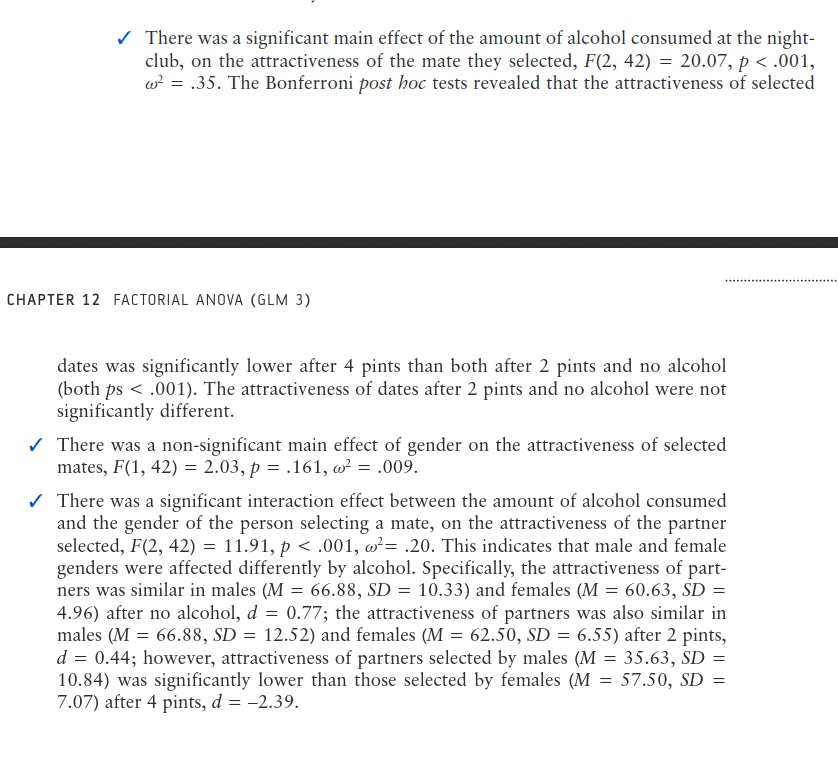

In [83]:
Image('reporting.png')